In [30]:
import numpy as np
from numpy import linalg as al
import networkx as nx
#import scipy
#from scipy import coo_array


def eigenvalores(A):
    av=list(al.eigh(A))

    av[0]=av[0].astype(float)
    av[1]=av[1].astype(float)

    for i in range(len(av[0]-1)):
        av[0][i]=round(float(av[0][i]),8)
    
    return np.sort(av[0])

def eigenvectores(A):
    av=list(al.eigh(A))

    av[1]=av[1].astype(float)

    for i in range(len(av[1]-1)):
        for j in range(len(av[1][i]-1)):
            av[1][i][j]=round(float(av[1][i][j]),8)
    return av[1].T

def potencia(matriz,n):
    temp=matriz
    for i in range(n-1):
        matriz=matriz.dot(temp)
    return(matriz)

def rtotal(g):
    rtotal=0
    n=max(g)+1
    for i in range(1,n):
        for j in range(1,n):
            if i!=j:
                rtotal+=nx.resistance_distance(g,i,j)
    return rtotal/2

Los vértices: [1, 2, 3, 4, 5, 6]
Las aristas: [(1, 2), (2, 3), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]


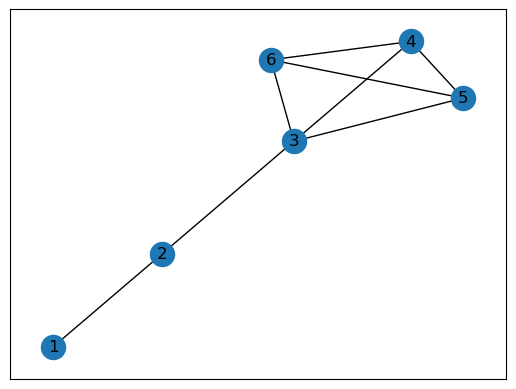

In [39]:
G1=nx.Graph()
G1.add_nodes_from([1,2,3,4,5,6])
G1.add_edges_from([(1,2),(2,3),(3,4),(3,5),(3,6),(4,5),(4,6),(5,6)])
nx.draw_networkx(G1)
print('Los vértices:', G1.nodes())
print('Las aristas:',G1.edges())

In [40]:
L=nx.laplacian_matrix(G1)
print(type(L))
L=L.toarray()
print(L)

<class 'scipy.sparse._csr.csr_matrix'>
[[ 1 -1  0  0  0  0]
 [-1  2 -1  0  0  0]
 [ 0 -1  4 -1 -1 -1]
 [ 0  0 -1  3 -1 -1]
 [ 0  0 -1 -1  3 -1]
 [ 0  0 -1 -1 -1  3]]


In [41]:
print('Los eigenvalores del laplaciano:')
print(eigenvalores(L))
print('Eigenvectores normalizados son: ')
print(eigenvectores(L))

Los eigenvalores del laplaciano:
[0.         0.48586307 2.42800673 4.         4.         5.0861302 ]
Eigenvectores normalizados son: 
[[ 0.40824829  0.40824829  0.40824829  0.40824829  0.40824829  0.40824829]
 [ 0.73120242  0.37593816 -0.16198056 -0.31505334 -0.31505334 -0.31505334]
 [-0.54131099  0.77299574  0.21046361 -0.14738279 -0.14738279 -0.14738279]
 [-0.         -0.         -0.         -0.76213967  0.63475733  0.12738234]
 [ 0.          0.          0.         -0.29293309 -0.51356577  0.80649886]
 [ 0.07522479 -0.30737829  0.87338462 -0.21374371 -0.21374371 -0.21374371]]


In [31]:
print('La resistencia total para esta gráfica es; ', rtotal(G1))

La resistencia total para esta gráfica es;  18.999999999999986


Aqui vamos a hacer la otra grafica 

Los vértices: [1, 2, 3, 4, 5, 6]
Las aristas: [(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (4, 5), (5, 6)]


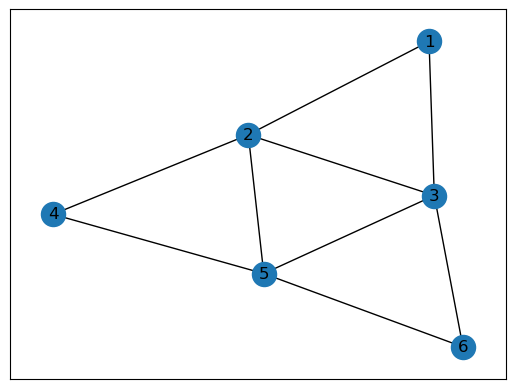

In [14]:
G2=nx.Graph()
G2.add_nodes_from([1,2,3,4,5,6])
G2.add_edges_from([(1,2),(1,3),(2,3),(2,4),(2,5),(4,5),(5,3),(5,6),(3,6)])
nx.draw_networkx(G2)
print('Los vértices:', G2.nodes())
print('Las aristas:',G2.edges())

In [15]:
L=nx.laplacian_matrix(G2)
print(type(L))
L=L.toarray()
print(L)

<class 'scipy.sparse._csr.csr_matrix'>
[[ 2 -1 -1  0  0  0]
 [-1  4 -1 -1 -1  0]
 [-1 -1  4  0 -1 -1]
 [ 0 -1  0  2 -1  0]
 [ 0 -1 -1 -1  4 -1]
 [ 0  0 -1  0 -1  2]]


In [9]:
print('Los eigenvalores del laplaciano:')
print(eigenvalores(L))
print('Eigenvectores normalizados son: ')
print(eigenvectores(L))

Los eigenvalores del laplaciano:
[-0.          1.69722436  1.69722436  4.          5.30277564  5.30277564]
Eigenvectores normalizados son: 
[[ 0.40824829  0.40824829  0.40824829  0.40824829  0.40824829  0.40824829]
 [-0.78146237 -0.11830388 -0.11830388  0.39073118  0.23660777  0.39073118]
 [-0.          0.20490834 -0.20490834  0.67676626  0.         -0.67676626]
 [-0.40824829  0.40824829  0.40824829 -0.40824829  0.40824829 -0.40824829]
 [ 0.23660777 -0.39073118 -0.39073118 -0.11830388  0.78146237 -0.11830388]
 [ 0.         -0.67676626  0.67676626  0.20490834  0.         -0.20490834]]


Resistencia total.

In [33]:
print("La resistencia total para esta grafica es; ", rtotal(G2))

La resistencia total para esta grafica es;  10.83333333333333


In [44]:
nx.resistance_distance(G2,1,4)

1.111111111111111

In [45]:
nx.resistance_distance(G2,1,5)

0.833333333333333

In [46]:
nx.resistance_distance(G2,1,2)

0.6111111111111108

In [47]:
nx.resistance_distance(G2,2,3)

0.44444444444444436

Calcular la resistencia Total (Revisamos con una gráfica vista en clase).

Los vértices: [1, 2, 3, 4, 5, 7, 6]
Las aristas: [(1, 2), (2, 3), (2, 4), (3, 5), (4, 5), (5, 6), (7, 6)]


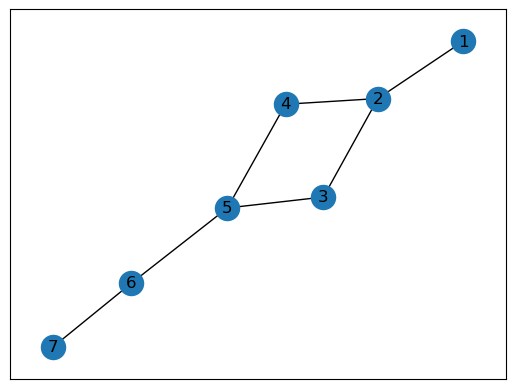

In [17]:
Gc=nx.Graph()
Gc.add_nodes_from([1,2,3,4,5,5,7])
Gc.add_edges_from([(1,2),(2,3),(2,4),(4,5),(3,5),(5,6),(6,7)])
nx.draw_networkx(Gc)
print('Los vértices:', Gc.nodes())
print('Las aristas:',Gc.edges())

In [20]:
rtotal=0
for i in range(1,8):
    for j in range(1,8):
        if i!=j:
            rtotal+=nx.resistance_distance(Gc,i,j)
print('La resistencia total de esta gráfica es; ', rtotal/2)

La resistencia total de esta gráfica es;  36.5


In [34]:
print("La resistencia total para esta grafica es; ", rtotal(Gc))

La resistencia total para esta grafica es;  36.5
